# 2 Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd

from pandas import DataFrame as dframe

## 2.1 Example Dataset

In [2]:
# ================== Part 1: Load Example Dataset  ===================
# We start this exercise by using a small dataset that is easily to visualize

In [3]:
# Load data and store into X
data = sio.loadmat('ex7data1.mat')

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [5]:
X = data['X']
X.shape

(50, 2)

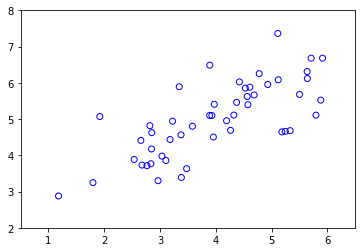

In [6]:
# Visualize the example dataset
plt.scatter(X[:, 0], X[:, 1], marker='o', edgecolor='b', c='none')
plt.axis([0.5, 6.5, 2, 8])
plt.show()

## 2.2 Implementing PCA
Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range 

It is possible that may instead output the negative of this, since $U1$ and $-U1$ are equally valid choices for the first principal component.

In [7]:
# You should now implement PCA, a dimension reduction technique
# Before running PCA, it is important to first normalize X
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    
    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm/sigma
    
    return X_norm, mu, sigma

In [8]:
def pca(X):
    '''
    PCA Run principal component analysis on the dataset X
       [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
       Returns the eigenvectors U, the eigenvalues (on diagonal) in S
    '''
    # Dimension of X
    m, n = X.shape
    
    # Need to return following variables correctly
    U = np.zeros(n)
    S = np.zeros(n)
    
    # Compute covariance matrix
    sigma = 1/m * X.T@X
    
    # Perform svd to covariance matrix
    U, S, Vh = np.linalg.svd(sigma)    
    
    return U, S

In [9]:
def drawLine(p1, p2, **kwargs):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)

In [10]:
X_norm, mu, sigma = featureNormalize(X)

In [11]:
X_norm.shape

(50, 2)

In [12]:
# Run PCA
U, S = pca(X_norm)

In [13]:
# Principal component
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [14]:
mu

array([3.98926528, 5.00280585])

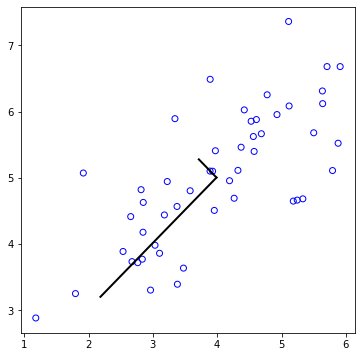

In [15]:
# Draw the eigenvectors centered at mean of data. These lines show directions of maximum variations in the dataset
fig = plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], edgecolor='b', color='none')
drawLine(mu, mu + 1.5 * S[0] * U[:,0], c='k', lw=2)
drawLine(mu, mu + 1.5 * S[1] * U[:,1], c='k', lw=2)
plt.show()

In [16]:
print('Top eigenvectors:')
print('U[:, 0] = %f %f' %(U[0, 0], U[0, 1]))
print('(you should expect to see -0.707107 -0.707107)')

Top eigenvectors:
U[:, 0] = -0.707107 -0.707107
(you should expect to see -0.707107 -0.707107)


## 2.3 Dimensionality Reduction with PCA
We can now reduce the feature dimension in the dataset (e.g. 2D -> 1D). In this part of the exercise, you will use the eigenvectors returned by PCA and project the example dataset into a 1-dimensional space.

By using the projected data, you can train your model faster as there are less dimensions in the input

### 2.3.1 Projecting the data onto principal components

In [17]:
# =================== Part 3: Dimension Reduction ===================
# You should now implement the projection step to map the data onto the first k eigenvectors.
# Note that the top K components in U are given by the first K columns of U, that is U reduce = U[:, :K]

In [18]:
def projectData(X, U, K):
    '''
    PROJECTDATA Computes the reduced data representation when projecting only 
    on to the top k eigenvectors
       Z = projectData(X, U, K) computes the projection of 
       the normalized inputs X into the reduced dimensional space spanned by
       the first K columns of U. It returns the projected examples in Z.
    '''
    
    # Need to return this variable correclty
    Z = np.zeros([X.shape[0], K])
    
    # Only take the top K eigenvectors in U (first K columns)
    U_reduced = U[:, :K]
    
    # Project data into new dimension
    Z = X @ U_reduced
    
    return Z

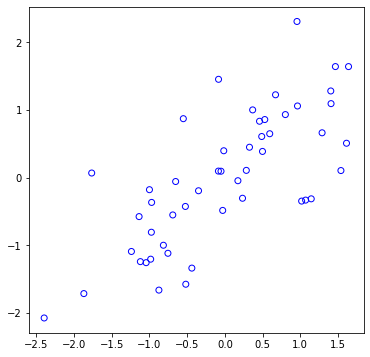

In [19]:
# Plot the normalized dataset (returned from pca)
plt.figure(figsize=(6, 6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], color='none', edgecolor='b')
plt.show()

In [20]:
# Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)

In [21]:
print('Projection of the first example: %f' %Z[0])
print('(this value should be about 1.481274)')

Projection of the first example: 1.481274
(this value should be about 1.481274)


### 2.3.2 Reconstructing an approximation of the data
After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space.

In [22]:
def recoverData(Z, U, K):
    '''
    RECOVERDATA Recovers an approximation of the original data when using the 
    projected data
       X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
       original data that has been reduced to K dimensions. It returns the
       approximate reconstruction in X_rec.
    '''
    
    U_rec = U[:, :K].T
    X_rec = Z @ U_rec
    
    return X_rec

In [23]:
X_rec = recoverData(Z, U, K)
print('Approximation of the first example: %s' %(X_rec[0]))
print('(this value should be about  -1.047419 -1.047419)')

Approximation of the first example: [-1.04741883 -1.04741883]
(this value should be about  -1.047419 -1.047419)


### 2.3.3 Visualizing the projections

the original data points are indicated with the blue circles, 
while the projected data points are indicatedwith the red circles


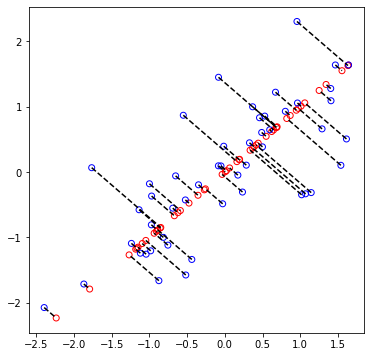

In [24]:
# Draw lines connecting the projected points to the original points
plt.figure(figsize=(6, 6))
print('the original data points are indicated with the blue circles, \nwhile the projected data points are indicated\
with the red circles')
plt.scatter(X_rec[:, 0], X_rec[:, 1], marker='o', c='none', edgecolor='r')
plt.scatter(X_norm[:, 0], X_norm[:, 1], color='none', edgecolor='b')
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i, :], X_rec[i, :], linestyle='--', color='k')
plt.show()

## 2.4 Face Image Dataset
In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat contains a dataset X of face images, each 32 x 32 in grayscale. Each row of X corresponds to one face image (a row vector of length 1024).

In [25]:
# =============== Part 4: Loading and Visualizing Face Data =============
# Load Face dataset
face_data = sio.loadmat('ex7faces.mat')

In [26]:
def displayData(X):
    
    # Determine number of rows and columns
    m, n = X.shape
    
    # width of the canvas and side of each image in each cell
    width = int(np.sqrt(m))
    side = int(np.sqrt(n))
    
    fig, ax = plt.subplots(width, width, figsize=(6, 6))

    for i in range(width):
        for j in range(width):
            img = X[i*width+j, :].reshape(side, side, order='F')
            ax[i, j].imshow(img, cmap='gray')
            ax[i, j].axis('off')

In [27]:
face_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [28]:
X = face_data['X']

In [29]:
X.shape

(5000, 1024)

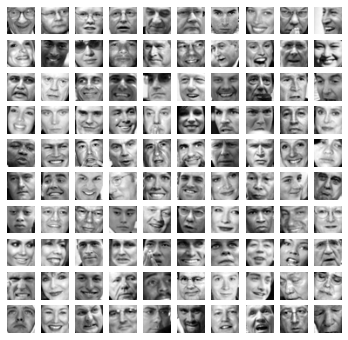

In [30]:
displayData(X[:100])

### 2.4.1 PCA on Faces

In [31]:
# =========== Part 5: PCA on Face Data: Eigenfaces  ===================
#  Run PCA and visualize the eigenvectors which are in this case eigenfaces
#  We display the first 36 eigenfaces.

In [32]:
# Normalize the dataset
X_norm, mu, sigma = featureNormalize(X)

In [33]:
# Run PCA
U, S = pca(X_norm)

In [34]:
U.shape

(1024, 1024)

In [35]:
X[:100, :].shape

(100, 1024)

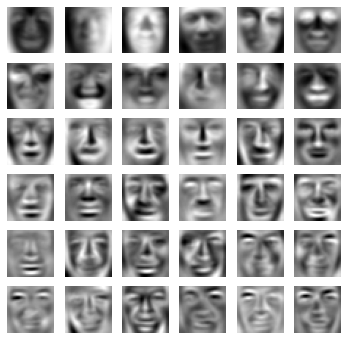

In [36]:
# Visualize top 36 eigenvectors
displayData(U[:, :36].T)

### 2.4.2 Dimensionality Reduction
Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions

The face dataset will be projected onto only the first 100 principal components. Thus, each face image is now described by a vectr $z^{(i)} \in \mathbb{R}^{100}$

In [37]:
# ============= Part 6: Dimension Reduction for Faces =================
# Project images to the eigen space using the top k eigenvectors
K = 100

In [38]:
Z = projectData(X_norm, U, K)

In [39]:
Z.shape

(5000, 100)

In [40]:
# ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
# Project images to the eigen space using the top K eigen vectors and visualize only using those K dimensions
# This part will recover the data to understand what is lost in the dimension reduction

In [41]:
K = 100

In [42]:
X_rec = recoverData(Z, U, K)

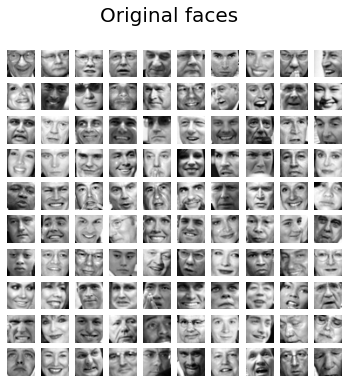

In [43]:
# Display normalize data
displayData(X[:100])
plt.suptitle('Original faces', fontsize=20)
plt.show()

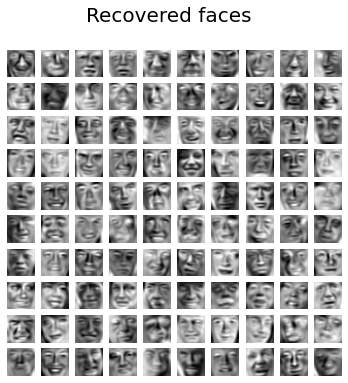

In [44]:
# Display normalize data
displayData(X_rec[:100])
plt.suptitle('Recovered faces', fontsize=20)
plt.show()

In [45]:
# === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization === (STILL IN PROGRESS)
# One usefull aplication of PCA is to use it to visualize high-dimension data.
# In the last K-Means exercise you ran K-Means on 3-dimensional pixel colors of an image. 
# We first visualize this output in 3D, and then apply PCA to obtain a visualization in 2D.

In [46]:
# In this part, you will run the K-Means algorithm on the example dataset we have provided
def runkMeans(X, initial_centroids, max_iters, plot_progress):
    '''  
    RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
       [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
       plot_progress) runs the K-Means algorithm on data matrix X, where each 
       row of X is a single example. It uses initial_centroids used as the
       initial centroids. max_iters specifies the total number of interactions 
       of K-Means to execute. plot_progress is a true/false flag that 
       indicates if the function should also plot its progress as the 
       learning happens. This is set to false by default. runkMeans returns 
       centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
       vector of centroid assignments (i.e. each entry in range [1..K])
    
    This code is slightly modified from the MATLAB's version, such that it unable to show
    the history of each iteration step. Nevertheless, it outputs similar results
    '''
    
    # Initialize some values
    m, n  = X.shape
    K = initial_centroids.shape[0]
    idx = np.zeros([m, 1])

    # Set up the initial centroids value to plot
    previous_centroids = initial_centroids
    current_centroids = previous_centroids
    
    if plot_progress:
        plt.figure(figsize=(7, 5))
    
    # Run K-Means
    for i in range(max_iters):

        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, current_centroids)

        if plot_progress:
            
            palette = sns.color_palette(None, K) 

            # Plot the K cluster using different colors
            for j in range(K):
                plt.title('Iteration Number: %d' %(i+1))
                plt.scatter(X[idx==j, 0], X[idx==j, 1], edgecolor=palette[j], color='none', alpha=0.3)


                # Plot the centroids as black x's 
                plt.scatter(previous_centroids[:, 0], previous_centroids[:, 1], marker='x', c='k', s=80)
                plt.scatter(current_centroids[:, 0], current_centroids[:, 1], marker='x', c='k', s=80)

                # Plot the history of centroids as black lines
                plt.plot((previous_centroids[:, 0], current_centroids[:, 0]),\
                         (previous_centroids[:, 1], current_centroids[:, 1]), lw=2, color='k')

        # Given the memberships, compute new centroids
        new_centroids = computeCentroids(X, idx, K);

        previous_centroids = current_centroids
        current_centroids = new_centroids
    
    
    plt.show()
    
    return new_centroids, idx

In [47]:
def kMeansInitCentroids(X, K):
    '''
    KMEANSINITCENTROIDS This function initializes K centroids that are to be used in K-Means on the dataset X
        centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be 
        used with the K-Means on the dataset X
    '''
    centroids = np.zeros([K, X.shape[1]])
    
    # randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first 
    centroids = X[randidx[:K], :]
    
    return centroids

In [48]:
# Reload the image from the previous exercise and run K-Means on it
A = plt.imread('bird_small.png')

In [49]:
A.shape

(128, 128, 3)

In [50]:
img_size = A.shape

In [51]:
X = np.reshape(A, [img_size[0]*img_size[1], 3])

In [52]:
X.shape

(16384, 3)

In [ ]:
K = 16
max_iters=10
initial_centroids = kMeansInitCentroids(X, K);
centroids, idx = runkMeans(X, initial_centroids, max_iters, False)